# Decision Tree
### 1) Can be used for both Classification as well as Regression
#### a) Root Nodes : Present in the beginning of Decision tree. Population           starts dividing according to various features 
#### b) Decision Nodes : Nodes splitted after Root node
#### c) Leaf nodes : Nodes where further splitting is not possible  
#### d) Sub-tree : Small section of tree is called sub tree
### 2) Entropy 
####  a) It basically measure impurity of our node
####  b) has value interval between [0, 1]
###  $$E(S)=-P_{(+)} log_{2} P_{(+)} - P_{(-)} log_{2} P_{(-)}$$
####  p(+) = Probability of positive class
####  p(-) = Probability of negative calss
####  S    = Subset of training example
### 3) GINI Index
####  a) has value interval between [0, 0.5]
#### $$GINI = 1 - \sum_{i=1}^{n} P^{2} $$

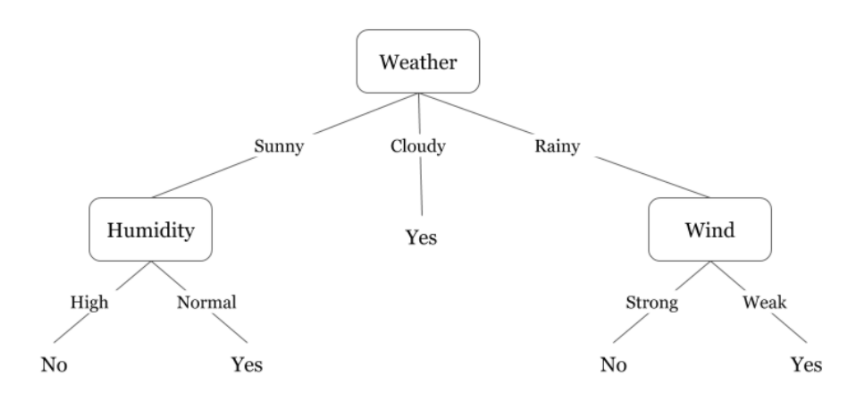

In [110]:
from IPython.display import Image
Image(filename='img.png')

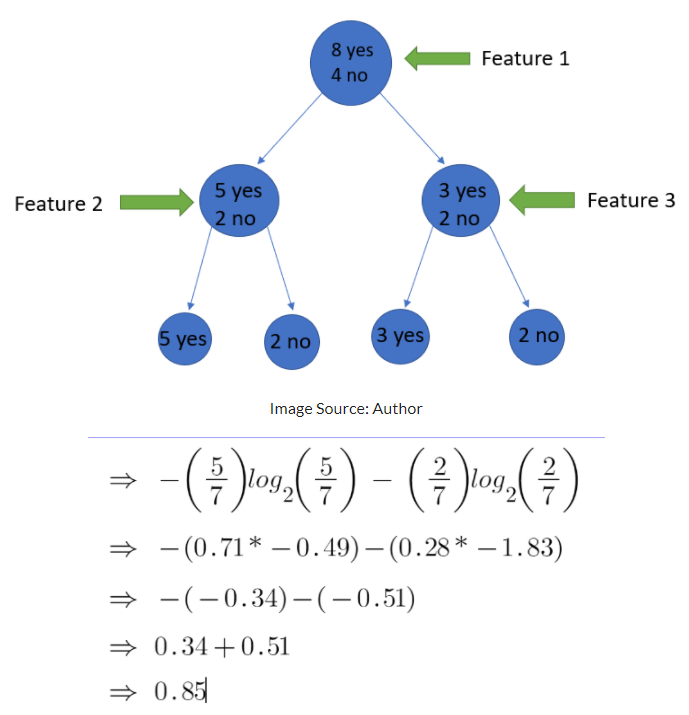

In [111]:
Image(filename='img2.png')

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [113]:
df = pd.read_csv('WineQT.csv')

In [114]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [116]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [117]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [118]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### 1)ID column of our dataset is in yhe last, So changing its position to first

In [119]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [120]:
ID = df.pop('Id')
df.insert(0, 'Id', ID)

### 2)Removing spaces from column names

In [121]:
df = df.rename({'fixed acidity': 'fixedAcidity','volatile acidity': 'volatileAcidity','citric acid': 'citricAcid','residual sugar': 'residualSugar','free sulfur dioxide': 'freeSulfurDioxide','total sulfur dioxide': 'totalSulfurDioxide'}, axis=1)

In [122]:
df.head()

,Id,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [123]:
df.shape

(1143, 13)

### 3) Now we will see effect of different features on quality of our wine

In [124]:
quality_count = df.groupby(['quality']).quality.count()

### 4) Scale of quality of wine

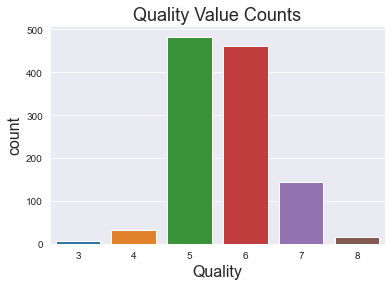

In [125]:
g = sns.barplot(x=quality_count.index,y=quality_count.values)
g.set_xlabel('Quality',size=16);
g.set_ylabel('count',size=16);
g.set_title('Quality Value Counts',size=18);

### Observation : Most of the wine have quality of between 5 to 7

### Now lets visualize of our features

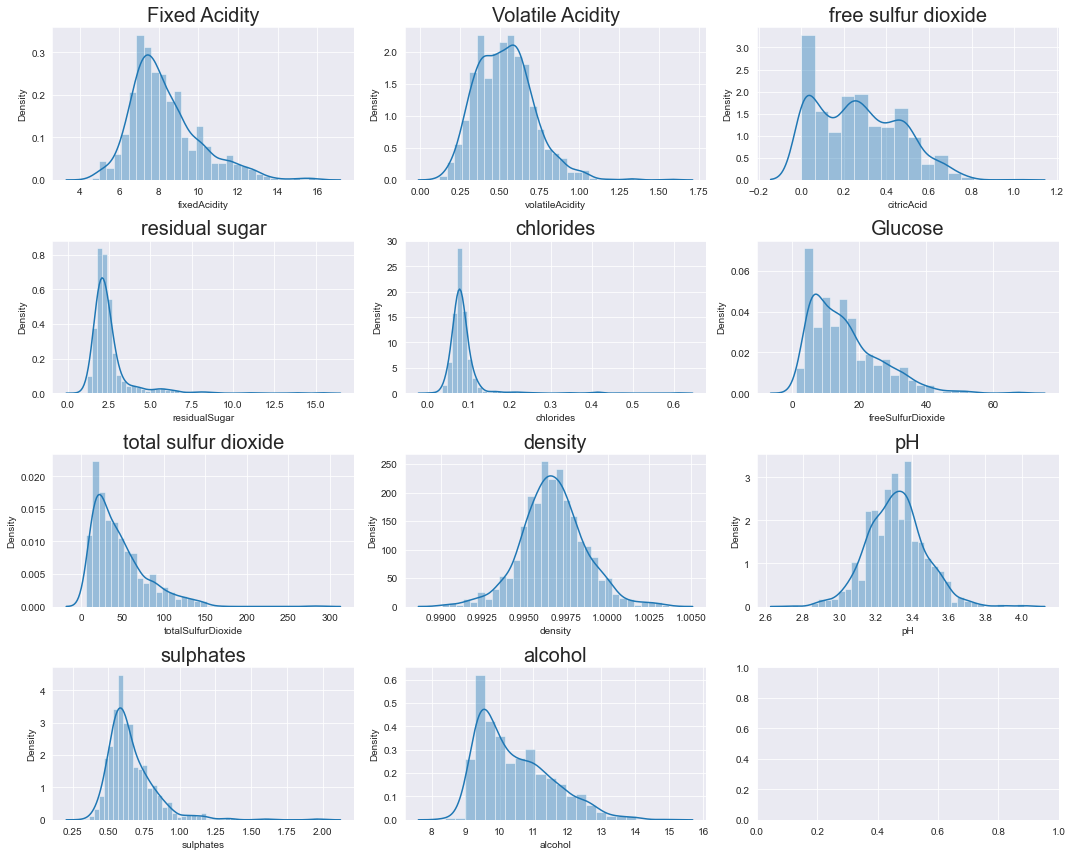

In [126]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(4, 3,figsize=(15,12))

sns.distplot(df['fixedAcidity'], ax=axes[0,0])
sns.distplot(df['volatileAcidity'], ax=axes[0,1])
sns.distplot(df['citricAcid'], ax=axes[0,2])

sns.distplot(df['residualSugar'], ax=axes[1,0])
sns.distplot(df['chlorides'], ax=axes[1,1])
sns.distplot(df['freeSulfurDioxide'], ax=axes[1,2])

sns.distplot(df['totalSulfurDioxide'], ax=axes[2,0])
sns.distplot(df['density'], ax=axes[2,1])
sns.distplot(df['pH'], ax=axes[2,2])

sns.distplot(df['sulphates'], ax=axes[3,0])
sns.distplot(df['alcohol'], ax=axes[3,1])

axes[0,0].set_title("Fixed Acidity", fontsize = 20,loc='center')
axes[0,1].set_title("Volatile Acidity", fontsize = 20,loc='center')
axes[0,2].set_title("free sulfur dioxide", fontsize = 20,loc='center')

axes[1,0].set_title("residual sugar", fontsize = 20,loc='center')
axes[1,1].set_title("chlorides", fontsize = 20,loc='center')
axes[1,2].set_title("Glucose", fontsize = 20,loc='center')

axes[2,0].set_title("total sulfur dioxide", fontsize = 20,loc='center')
axes[2,1].set_title("density", fontsize = 20,loc='center')
axes[2,2].set_title("pH", fontsize = 20,loc='center')

axes[3,0].set_title("sulphates", fontsize = 20,loc='center')
axes[3,1].set_title("alcohol", fontsize = 20,loc='center')

plt.tight_layout()

### Observation : Almost all of the variables are normally distributed

### 5) Effect of Fixed and volatile acidity on Quality of Wine

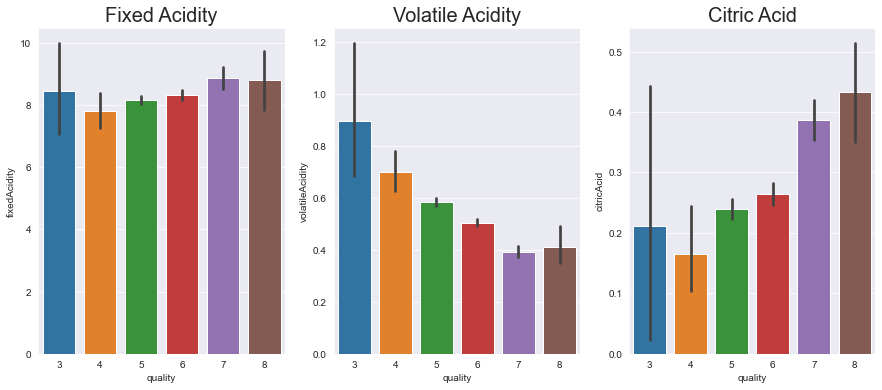

In [127]:
fig, axes = plt.subplots(1, 3,figsize=(15,6))
sns.barplot(y='fixedAcidity',x='quality',data=df,ax=axes[0])
sns.barplot(y='volatileAcidity',x='quality',data=df,ax=axes[1])
sns.barplot(y='citricAcid',x='quality',data=df,ax=axes[2])
axes[0].set_title("Fixed Acidity", fontsize = 20,loc='center')
axes[1].set_title("Volatile Acidity", fontsize = 20,loc='center')
axes[2].set_title("Citric Acid", fontsize = 20,loc='center');

### observation : 
#### a) In case of fixed acidity qualitiy of wine did not cahnged that much
#### b) In case of Volatile acidity as volatile acidity decrease quality of wine increases
#### c) For citric acid as quantity of acid increases quality of wine also increases

### 6) As we have seen effects of theses variables on quality of wine. Now lets see relationship between them

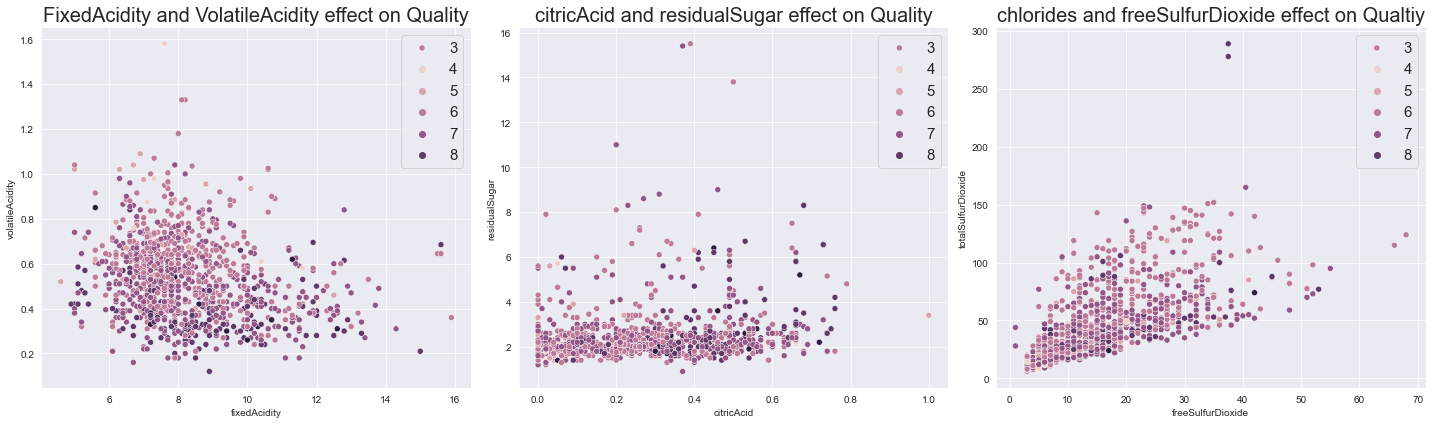

In [128]:
fig, axes = plt.subplots(1, 3,figsize=(20,6))

sns.scatterplot(x='fixedAcidity',y='volatileAcidity',hue='quality',data=df,ax=axes[0])
sns.scatterplot(x='citricAcid',y='residualSugar',hue='quality',data=df,ax=axes[1])
sns.scatterplot(x='freeSulfurDioxide',y='totalSulfurDioxide',hue='quality',data=df,ax=axes[2])

axes[0].set_title("FixedAcidity and VolatileAcidity effect on Quality", fontsize = 20,loc='center')
axes[1].set_title("citricAcid and residualSugar effect on Quality", fontsize = 20,loc='center')
axes[2].set_title("chlorides and freeSulfurDioxide effect on Qualtiy", fontsize = 20,loc='center')
axes[0].legend(labels=quality_count.index, fontsize = 15)
axes[1].legend(labels=quality_count.index, fontsize = 15)
axes[2].legend(labels=quality_count.index, fontsize = 15)
plt.tight_layout()

<AxesSubplot:>

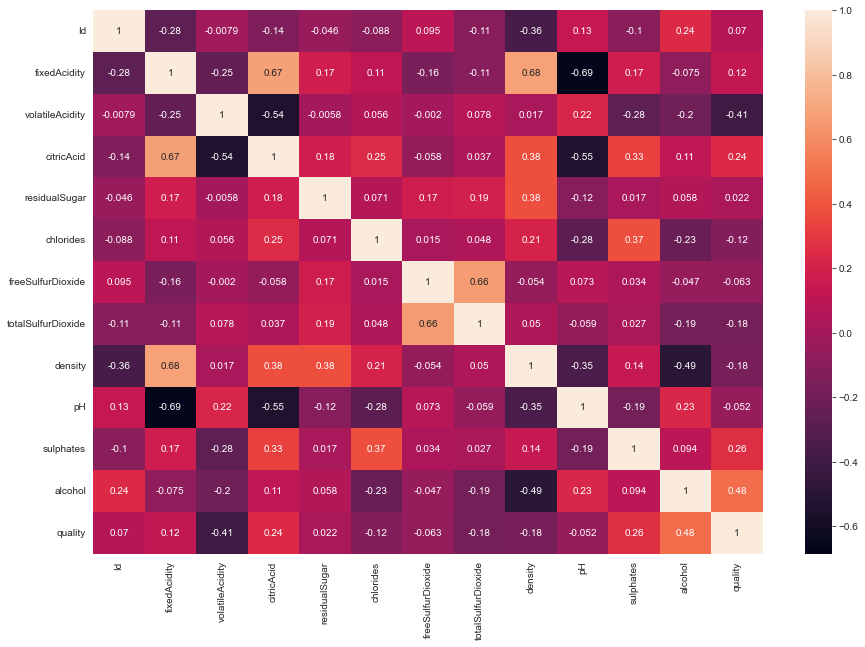

In [129]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

## Model Building

In [158]:
y = df['quality']
X = df.drop(['quality','Id'],axis=1)

In [159]:
X.head()

,fixedAcidity,volatileAcidity,citricAcid,residualSugar,chlorides,freeSulfurDioxide,totalSulfurDioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [160]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=82)

In [163]:
print(f'Shape of the X_train: {X_train.shape}')
print(f'Shape of the X_test: {X_test.shape}')

Shape of the X_train: (914, 11)
Shape of the X_test: (229, 11)


In [164]:
print(f'Shape of the X_train: {y_train.shape}')
print(f'Shape of the X_test: {y_test.shape}')

Shape of the X_train: (914,)
Shape of the X_test: (229,)


In [173]:
clf = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)

In [174]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [175]:
clf.score(X_train,y_train)

0.587527352297593

In [176]:
predict = clf.predict(X_test)

In [177]:
predict

array([6, 6, 6, 7, 6, 6, 7, 5, 6, 6, 6, 5, 6, 7, 6, 5, 6, 7, 6, 5, 6, 6,
       6, 7, 5, 6, 5, 6, 6, 6, 6, 5, 7, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5,
       6, 5, 6, 7, 5, 6, 5, 5, 6, 6, 5, 7, 5, 5, 5, 6, 5, 5, 6, 5, 6, 6,
       6, 7, 6, 7, 6, 6, 7, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6,
       6, 6, 5, 6, 6, 5, 5, 5, 7, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 5, 6, 7, 5, 6, 5, 6, 5, 5, 5, 5, 7, 6, 6, 5, 6, 5, 6, 6,
       6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 7, 5, 5, 5, 5,
       5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6,
       6, 6, 7, 6, 5, 6, 7, 6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5,
       5, 6, 5, 5, 7, 7, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6,
       6, 5, 6, 6, 6, 7, 7, 6, 6], dtype=int64)

In [178]:
accuracy_score(y_test,predict)

0.6157205240174672

In [179]:
confusion_matrix(predict,y_test)

array([[ 0,  0,  0,  0,  0],
       [ 2, 63, 22,  0,  0],
       [ 2, 37, 67, 14,  1],
       [ 0,  4,  5, 11,  1],
       [ 0,  0,  0,  0,  0]], dtype=int64)

<AxesSubplot:>

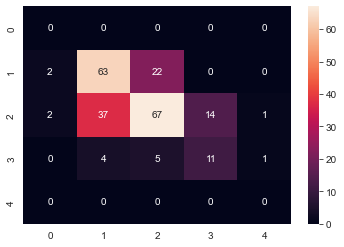

In [192]:
sns.heatmap(confusion_matrix(predict,y_test),annot=True)